# Assignment #1

Author: David Soriano

Collaborators: Van Tran

Integrity Statement: Did you use an LLM to write any of the code in your assignment? (Y/N): N

IMPORTANT ANYTHING MARKED UNDER FINISHED IS FINISHED

# Instructions

You are permitted to work with a partner in the class to complete your assignment, but no more than one partner. However, every student must submit their own copy of the assignment, and must list your collaborators.

You should refer to your textbook and posted course materials as resources. You are also allowed to use the documentation for python, pandas, matplotlib, and seaborn. You may not use other online resources or LLMs for this assignment.

You will be graded based on (1) correctness, (2) completeness, (3) documentation, and (4) overall readability of your notebook. The assignment will be worth a total of 100 points in the Homework category (15% of your grade).

**Submission and Deadline: This assignment must be submitted on Canvas before class begins on Wednesday, September 17.**

You must complete all of the steps below:

1. Organize your project in a project folder (or repo) with three subfolders: src, data, and presentations. Place the provided dataset in the data folder, and the two provided notebooks in the src folder.
2. Use a python virtual environment, install the libraries you use, and create a requirements.txt file (using `pip freeze`)
3. Open and read through the provided data cleaning notebook to understand the cleaning process and all of its operations. (Fair game).
4. Run the separate notebook provided for cleaning the CDC data. It should create a new file. You do not need to edit that notebook at all, and only need to run it once. All coding will take place in this notebook.

The rest of the assignment should be completed in this notebook:

1. Read in the clean data in from the provided csv file and write code to examine it and understand it
2. Write code to determine which cancer site had the highest incidence of new cases for females in each individual year included in the dataset, and present your results
3. Create a line plot for All Invasive Cancer Sites with x-axis = year, y-axis = incidence of cancer cases, and a separate line for Males and Females (two lines total)
4. Create a line plot for females with x-axis = year, y-axis = incidence of cancer, and a separate line for each individual cancer site (many lines)
5. Create a scatter plot with a single marker for each (site, sex) pair in 2000, with x-axis = population, y-axis = incidence of cancer cases. Use a different color marker for Males and Females
6. Create a bar plot with a bar for each individual cancer site (excluding the all-inclusive case), and bar length based on the incidence of new cases for males in the year 2000
7. For each cancer site and each year, determine whether males or females had the higher incidence (hint: groupby)
8. Create a pivot table with a row for each cancer site, column for each year, and a value equal to the total incidence of males and females combined

9. Add your full name and the full names of your collaborator (if any) at the top of this document. Answer the integrity statement. 
10. Submit this notebook on Canvas together with the requirements.txt file

**NOTE:** For each plot, add a descriptive title and label the axes appropriately, and remark on any observations that you make.

**HINT #1:** Most problems can be solved by some combination of filtering and/or groupby before aggregating (e.g., taking the max) and plotting.

**HINT #2:** You can solve these problems in any order, so do the ones you find easiest first and the rest will start to feel easier.

**Useful Documentation**
- Pandas general documentation: https://pandas.pydata.org/docs/user_guide/index.html
- Pandas dataframe reshaping: https://pandas.pydata.org/docs/user_guide/reshaping.html
- Pandas Copy-on-Write: https://pandas.pydata.org/docs/user_guide/copy_on_write.html
- Pandas missing data: https://pandas.pydata.org/docs/user_guide/missing_data.html
- Pandas split-apply-combine (groupby, agg): https://pandas.pydata.org/docs/user_guide/groupby.html 

- Matplotlib documentation: https://matplotlib.org/stable/plot_types/index.html
- Seaborn documentation: https://seaborn.pydata.org/


# Imports and CoW

In [1]:
#Uncomment the libraries you need. Be sure to install whichever ones you need into your Python virtual environment. You may also need to also install Jupyter or iPython to run your notebook, depending on your setup.

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# import seaborn as sns
import numpy as np

In [2]:
pd.set_option("mode.copy_on_write", True) # will be the default in pandas 3.0, best to enforce it

# 1. Read in Data

In [3]:

cwd = Path().cwd() #should be our src folder, containing this notebook
project_folder = cwd.parent #should be our project folder, containing the src folder
dataset_path = Path('data/clean_cdc_cancer.csv') #using a data folder makes life easier

file = project_folder / dataset_path #join the project folder with the dataset path

if not file.exists():
    raise FileNotFoundError(f"Dataset file not found: {file}")

# variable to read in the cleaned cdc data
cancer = pd.read_csv(file)
cancer
# print("Range of Years: ", cancer['Year'].min(), " - ", cancer['Year'].max())

# newdata = pd.read_csv('data/cancer_incidence_2019-2022.csv')
# newdata

,Cancer Sites,Cancer Sites Code,Year,Sex,Count,Population,Age-Adjusted Rate,Age-Adjusted Rate Lower 95% Confidence Interval,Age-Adjusted Rate Upper 95% Confidence Interval,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval
0,All Invasive Cancer Sites Combined,0,1999,F,631741,140394214,420.5,419.4,421.5,450.0,448.9,451.1
1,All Invasive Cancer Sites Combined,0,1999,M,672530,135067134,572.4,571.0,573.8,497.9,496.7,499.1
2,All Invasive Cancer Sites Combined,0,2000,F,641968,141865770,421.3,420.3,422.4,452.5,451.4,453.6
3,All Invasive Cancer Sites Combined,0,2000,M,690598,136692444,577.0,575.6,578.3,505.2,504.0,506.4
4,All Invasive Cancer Sites Combined,0,2001,F,662313,143603977,427.6,426.6,428.7,461.2,460.1,462.3
...,...,...,...,...,...,...,...,...,...,...,...,...
4626,Invalid Value(s),99999,2020,F,0,167308759,0.0,0.0,0.0,0.0,0.0,0.0
4627,Invalid Value(s),99999,2020,M,0,164218174,0.0,0.0,0.0,0.0,0.0,0.0
4628,Invalid Value(s),99999,2021,F,0,167630750,0.0,0.0,0.0,0.0,0.0,0.0
4629,Invalid Value(s),99999,2021,M,0,164418227,0.0,0.0,0.0,0.0,0.0,0.0


# 2. Incidence for Females Each Year 

Write code to determine which cancer site had the highest incidence of new cases for females in each year 1999-2022 (hint: filter then groupby then agg)

can use sort_values function to determine which cancert site had the highest incidence of new cases for females in each year 1999-2022

CAN USE THE .GROUPBY() FUNCTION WITH THE .AGG FUNCTION TO AGGREGATE THE DATA TOGETHER

1) filter to show only data from 1999-2022, females only, and incidence

2) use groupby on the columns to group up your data by year and cancer site

3) aggregate to summarize data into single statistics (highest incidence of new cases)

In [4]:
# filter = cancer.query("(Sex == 'F') and (Year >= 1999 and Year <= 2022) and (Cancer Sites != 'All Invasive Cancer Sites Combined')")

# 1. filter the cleaned data so that it only shows data where the sex is female and it is between 1999 and 2022
filter = cancer.query("(Sex == 'F') and (Year >= 1999 and Year <= 2022)")

# printing to check
filter

# 2. filter the data so that All Invasive Cancer Sites Combined isint shown as if it were it would always be the highest
# doesnt say to do this but in all honesty i thought it would be the best choice even though it still has a repeating answer if you take it out LOL
filter = filter.loc[filter['Cancer Sites'] != 'All Invasive Cancer Sites Combined', :]

# making sure all invasive cancer sites combined is not shown
filter['Cancer Sites'].unique()




 #print("Range of Years: ", filter['Year'].min(), " - ", filter['Year'].max())

#filter.columns


# filter['Cancer Sites'].value_counts()

array(['Oral Cavity and Pharynx', 'Lip', 'Tongue', 'Salivary Gland',
       'Floor of Mouth', 'Gum and Other Mouth', 'Nasopharynx', 'Tonsil',
       'Oropharynx', 'Hypopharynx', 'Other Oral Cavity and Pharynx',
       'Digestive System', 'Esophagus', 'Stomach', 'Small Intestine',
       'Colon and Rectum', 'Colon excluding Rectum', 'Cecum', 'Appendix',
       'Ascending Colon', 'Hepatic Flexure', 'Transverse Colon',
       'Splenic Flexure', 'Descending Colon', 'Sigmoid Colon',
       'Large Intestine, NOS', 'Rectum and Rectosigmoid Junction',
       'Rectosigmoid Junction', 'Rectum',
       'Anus, Anal Canal and Anorectum',
       'Liver and Intrahepatic Bile Duct', 'Liver',
       'Intrahepatic Bile Duct', 'Gallbladder', 'Other Biliary',
       'Pancreas', 'Retroperitoneum', 'Peritoneum, Omentum and Mesentery',
       'Other Digestive Organs', 'Respiratory System',
       'Nose, Nasal Cavity and Middle Ear', 'Larynx', 'Lung and Bronchus',
       'Pleura', 'Trachea, Mediastinum and Ot

In [5]:
# want to find cancer site with highest incidence of new cases for each year in 1999 to 2022
# filter.groupby(['Year', 'Cancer Sites'])['Count'].sum().sort_values()


# 3. group by years and cancer sites, then sum up their counts together
check = filter.groupby(['Year', 'Cancer Sites'])['Count'].sum()
check

# 4. regroup the data by year again and check the highest cancer site for each year
newcheck = check.groupby('Year').idxmax()
newcheck




Year
1999    (1999, Female Breast)
2000    (2000, Female Breast)
2001    (2001, Female Breast)
2002    (2002, Female Breast)
2003    (2003, Female Breast)
2004    (2004, Female Breast)
2005    (2005, Female Breast)
2006    (2006, Female Breast)
2007    (2007, Female Breast)
2008    (2008, Female Breast)
2009    (2009, Female Breast)
2010    (2010, Female Breast)
2011    (2011, Female Breast)
2012    (2012, Female Breast)
2013    (2013, Female Breast)
2014    (2014, Female Breast)
2015    (2015, Female Breast)
2016    (2016, Female Breast)
2017    (2017, Female Breast)
2018    (2018, Female Breast)
2019    (2019, Female Breast)
2020    (2020, Female Breast)
2021    (2021, Female Breast)
2022    (2022, Female Breast)
Name: Count, dtype: object

# 3. Line plots for male and female, all sites 

Create a line plot for All Invasive Cancer Sites with x-axis = year, y-axis = incidence of cancer cases, and a separate line for Males and Females (two lines total)

x axis = year


y axis = incidence of cancer cases


two lines on the graph, one for men, one for women

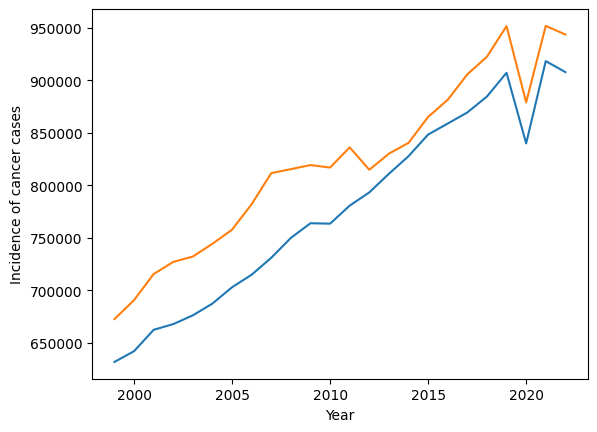

In [6]:
# 1. change the x and y label so that it reflects x = year and y = incidence of cancer cases
plt.xlabel('Year')
plt.ylabel('Incidence of cancer cases')

# 2. filter the data so that it shows only all invasive cancer sites combined that will be used for both males and females seperately
lineplotfilter = cancer.loc[cancer['Cancer Sites'] == 'All Invasive Cancer Sites Combined']

# 3. filter for an only female line where it includes the invasive cancer sites combined for only females
# i think i couldve done it without having to make the lineplotfilter now that i think about it
femaleline = lineplotfilter[lineplotfilter['Sex'] == "F"]

# 4. filter for an only male line
maleline = lineplotfilter[lineplotfilter['Sex'] == "M"]

# 5. plot the years and counts of the male and female line
plt.plot(femaleline['Year'], femaleline['Count'])
plt.plot(maleline['Year'], maleline['Count'])



# 4. Line plots for cancer sites 

 Create a line plot for females with x-axis = year, y-axis = incidence of cancer, and a separate line for each cancer site (many lines)

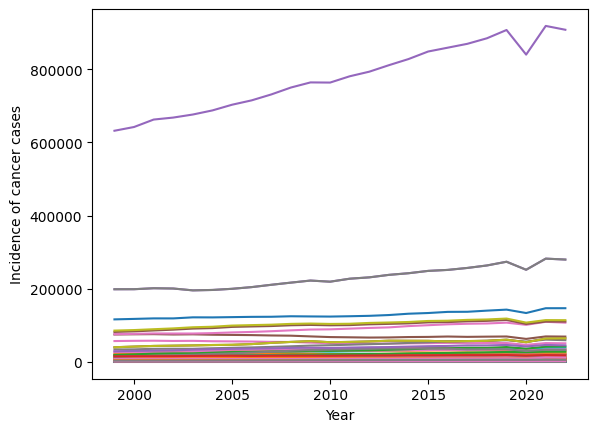

In [7]:
# 1. Label the x and y axis by whats needed
plt.xlabel('Year')
plt.ylabel('Incidence of cancer cases')

# 2. make data so that it only shows female data
femaledata = cancer.loc[cancer['Sex'] == 'F']

# 3. group by year and cancer sites and combine the count, makes it so that the rows are the years and the columns are the cancer sites
femaledata = femaledata.groupby(['Year', 'Cancer Sites'])['Count'].sum().unstack()

# 4. plot the data
plt.plot(femaledata)




# 5. Scatter plot for 2020 

Create a scatter plot with a single marker for each (site, sex) pair in 2000, with x-axis = population, y-axis = incidence of cancer cases. Use a different color marker for Males and Females

1) make the x and y axis with the x being population and the y being incidence of cancer cases
2) make the data and filter it so that it only shows people from the 2000
3) group data by their site and sex


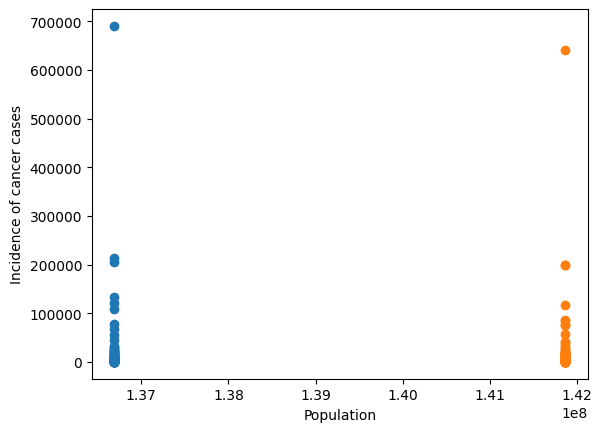

In [8]:
# coordinates of each point in a scatter plot are determined by two columns, population and count where as site and sex determine where each point is placed since it has to match to a site and sex

# 1. making sure that the data is only in 2000 and splitting them into two different scatter datas just so that they have different colors (when i didint split the data it was the same color and this was the best way i could think to solve it)
scatterdata = cancer.loc[cancer['Year'] == 2000]
malescatterdata = scatterdata.loc[scatterdata['Sex'] == 'M']
femalescatterdata = scatterdata.loc[scatterdata['Sex'] == 'F']

# 2. group by cancer site and sex and sum their count and population to be able to keep them to use for the scatter data for both genders
malescatterdata = malescatterdata.groupby(['Cancer Sites', 'Sex'])[['Count', 'Population']].sum()
femalescatterdata = femalescatterdata.groupby(['Cancer Sites', 'Sex'])[['Count', 'Population']].sum()

# check
malescatterdata
femalescatterdata

# 3. plot both datas by population and count (x,y)
# x and y label is population and incidence of cancer cases
plt.xlabel('Population')
plt.ylabel('Incidence of cancer cases')
plt.scatter(malescatterdata['Population'], malescatterdata['Count'])
plt.scatter(femalescatterdata['Population'], femalescatterdata['Count'])

# 6. Bar plot for each site 

Create a bar plot with a bar for each individual cancer site (excluding the all-inclusive case), and bar length based on the incidence of new cases for males in the year 2000

<BarContainer object of 94 artists>

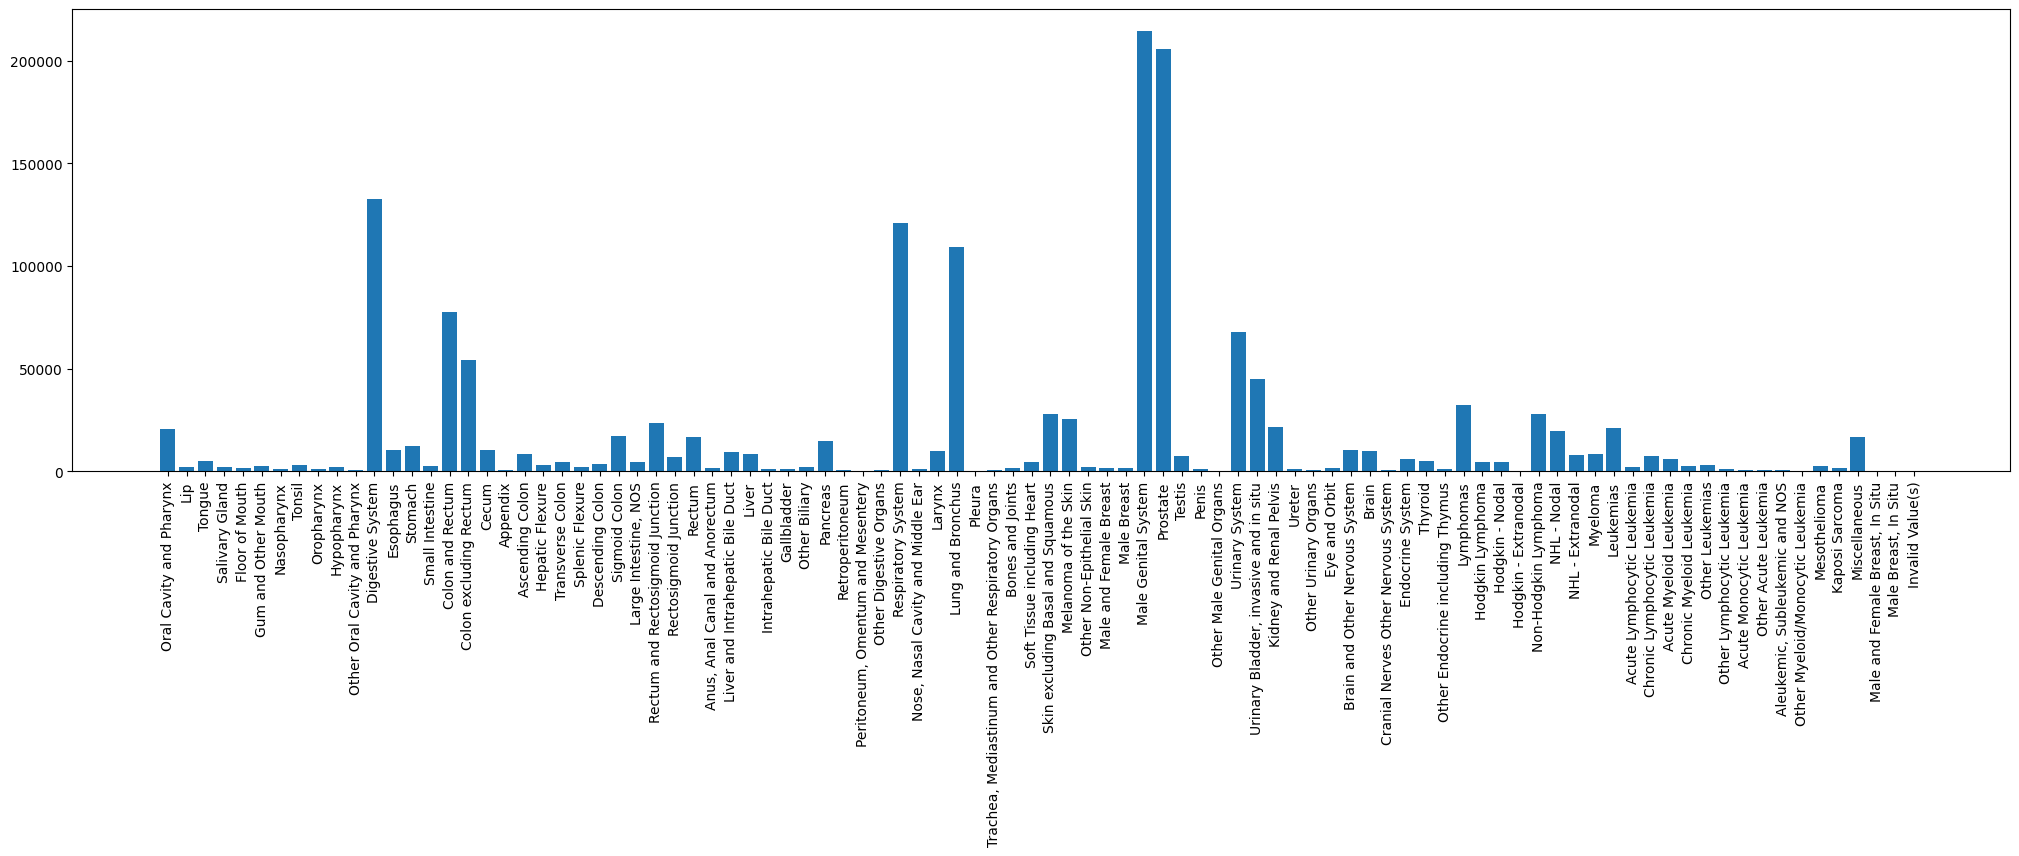

In [9]:
# 1. variable bar data made so that it only includes data where the sex is male
bardata = cancer.loc[cancer['Sex'] == 'M']

# checking
bardata

# 2. makes it so that it only takes data from 2000
bardata = bardata.loc[bardata['Year'] == 2000]

# check
bardata

# 3. makes sure to exclude all invasive case as it says in the description
bardata = bardata.loc[bardata['Cancer Sites'] != 'All Invasive Cancer Sites Combined']

# 4. makes the x and y portions of the data the cancer sites and count of each cancer site in that order
bardatax = bardata['Cancer Sites']
bardatay = bardata['Count']

# used to make sure you can see what each cancer site is through rotating the letters and making them smaller
plt.figure(figsize=(25,6))
plt.xticks(rotation=90)

# plot
plt.bar(bardatax, bardatay)






# 7. Higher Incidence Between Sexes

For each cancer site and each year, determine whether males or females had the higher incidence

In [10]:
# 1. make seperate datas for male and females but group by site and year
# malecomparisondata = cancer.loc[cancer['Sex'] == 'M']
 #femalecomparisondata = cancer.loc[cancer['Sex'] == 'F']


# 2. group by site and year
# malecomparisondata.groupby(['Year', 'Cancer Sites'])['Count'].sum()

# check
# malecomparisondata

# femalecomparisondata.groupby(['Year', 'Cancer Sites'])['Count'].sum()
# femalecomparisondata

#malecomparisontable = cancer.query("Sex == 'M' and Year >= 1999")
malecomparisontable = cancer.loc[:, "Cancer Sites" : "Count"] #Slicing to get only the columns we need
malecomparisontable = malecomparisontable.drop("Cancer Sites Code", axis = "columns") #Dropping the Cancer Sites Code column as it is not needed
malecomparisontable = malecomparisontable.loc[malecomparisontable["Sex"] == "M"] #Filtering out only M
malecomparisontable
femalecomparisontable = cancer.loc[:, "Cancer Sites" : "Count"] #Slicing to get only the columns we need
femalecomparisontable = femalecomparisontable.drop("Cancer Sites Code", axis = "columns") #Dropping the Cancer Sites Code column as it is not needed
femalecomparisontable = femalecomparisontable.loc[femalecomparisontable["Sex"] == "F"] #Filtering out only 
femalecomparisontable

merged = pd.merge(left = malecomparisontable, right = femalecomparisontable, left_on = ['Cancer Sites', 'Year'], right_on = ['Cancer Sites', 'Year']) #Merging both male and female tables 
merged["Higher Incidence"] = np.where(merged['Count_x'] > merged['Count_y'], 'M', 'F') #Using numpy where function to determine which group has higher count
# example to show the new column works
merged[1450:1500]


,Cancer Sites,Year,Sex_x,Count_x,Sex_y,Count_y,Higher Incidence
1450,Cranial Nerves Other Nervous System,2009,M,690,F,797,F
1451,Cranial Nerves Other Nervous System,2010,M,654,F,786,F
1452,Cranial Nerves Other Nervous System,2011,M,660,F,739,F
1453,Cranial Nerves Other Nervous System,2012,M,757,F,721,M
1454,Cranial Nerves Other Nervous System,2013,M,703,F,802,F
1455,Cranial Nerves Other Nervous System,2014,M,737,F,754,F
1456,Cranial Nerves Other Nervous System,2015,M,696,F,735,F
1457,Cranial Nerves Other Nervous System,2016,M,752,F,723,M
1458,Cranial Nerves Other Nervous System,2017,M,712,F,769,F
1459,Cranial Nerves Other Nervous System,2018,M,632,F,610,M


# 8. Pivot table for cancer / year 

Create a pivot table with a row for each cancer site, column for each year, and a value equal to the total incidence of males and females combined

In [11]:
# 1. group by cancer site and year and get the count meaning the total incidence of males and females combined
# pivottabledata = cancer.groupby(['Cancer Sites', 'Year'])['Count'].sum().unstack()

# used the pivot table function (who knew) to create the pivot table where values is what is being aggregated, index is rows, columns is year, and aggfunc is what i did to values which was add all of them so that it would combine male and female data
pivottabledata = cancer.pivot_table(values = 'Count', index = 'Cancer Sites', columns = 'Year', aggfunc = 'sum')

pivottabledata

#pivottabledata.pivot_table(values = 'Count', index = 'Cancer Sites', columns = 'Year')

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Cancer Sites,,,,,,,,,,,,,,,,,,,,,
Acute Lymphocytic Leukemia,3840,4049,4159,4122,4208,4429,4342,4550,4678,4884,...,4872,5091,5396,5416,5403,5705,5585,5545,5434,5439
Acute Monocytic Leukemia,549,590,690,704,767,783,774,767,934,823,...,678,684,698,688,665,673,631,571,548,446
Acute Myeloid Leukemia,10000,10644,10776,10452,10844,10901,10737,11060,11200,11644,...,14955,15521,15344,15706,15742,16405,16971,16604,17135,17266
"Aleukemic, Subleukemic and NOS",1385,1403,1390,1412,1512,1507,1569,1603,1820,1771,...,2379,2336,2427,2127,2235,2367,2313,2368,2446,2248
All Invasive Cancer Sites Combined,1304271,1332566,1377750,1394720,1408190,1431604,1460548,1496800,1542471,1565155,...,1640952,1667957,1713267,1740066,1774849,1806799,1858563,1718755,1869872,1851238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Urinary Bladder, invasive and in situ",59051,60389,60862,62138,63836,65631,66706,65849,67731,68898,...,74645,75838,76475,77151,78207,77801,78932,74953,79510,76529
Urinary System,94493,97794,100484,103705,108290,112325,115844,117595,121451,125054,...,137170,140841,144305,146994,150071,151149,155416,145779,155747,151549
"Uterus, NOS",1173,1236,1244,1276,1313,1246,1297,1266,1293,1445,...,1685,1874,1936,1963,1927,2063,2244,2029,2280,2080
